In [1]:
from dataclasses import dataclass

@dataclass
class Fight:
    R_fighter:str
    B_fighter:str
    R_record:list
    B_record:list
    Rematch:bool
    R_KD:int
    B_KD:int
    R_SIG_STR:list  #need to split
    B_SIG_STR:list  #need to split
    R_TD:list       #need to split
    B_TD:list       #need to split
    R_SUB_ATT:int
    B_SUB_ATT:int
    R_CTRL:int  
    B_CTRL:int  #use this to find total time spent on the ground 
    R_HEAD:list     #need to split
    B_HEAD:list     #need to split
    win_by:str
    last_round:int
    last_round_time:int 
    date:str
    Fight_type:str 
    Winner:str

In [2]:
import numpy as np
from collections import Counter
from math import sqrt
import matplotlib.pyplot as plt

def calculate_statistics(data):
    # Mean
    mean = np.mean(data)
    
    # Mode
    mode = Counter(data).most_common(1)[0][0]
    
    # Median
    median = np.median(data)
    
    # Average
    average = np.average(data)
    
    # Sum
    total_sum = np.sum(data)
    
    # Variance
    variance = np.var(data)
    
    # Standard Deviation
    std_deviation = np.std(data)
    
    return mean, mode, median, average, total_sum, variance, std_deviation

def remove_outliers(data):
    mean, mode, median, average, total_sum, variance, std_deviation = calculate_statistics(data)
    outliers_removed = [x for x in data if (x > mean - 2 * std_deviation)]
    outliers_removed = [x for x in outliers_removed if (x < mean + 2 * std_deviation)]
    return outliers_removed

def print_statistics(data):
    mean, mode, median, average, total_sum, variance, std_deviation = calculate_statistics(data)
    print("Mean: " + str(mean))
    print("Mode: " + str(mode))
    print("Median: " + str(median))
    print("Average: " + str(average))
    print("Sum: " + str(total_sum))
    print("Variance: " + str(variance))
    print("Standard Deviation: " + str(std_deviation))
    print()

In [3]:
#open the database and split it into a list of fights(class)

f = open("Optimized_database.csv", "r")
excel = f.read().split("\n")

header = excel[0]
#print(header)
header = header.split(',')
excel = excel[1:7273]

f.close()

database = []
for datapoint in excel:
    datapoint = datapoint.split(",")

    if datapoint[4] == "True":
        datapoint[4] = True
    else:
        datapoint[4] = False

    fight = Fight(datapoint[0], datapoint[1], datapoint[2].split("_"), datapoint[3].split("_"), datapoint[4]
                  , datapoint[5], datapoint[6], datapoint[7].split("_"), datapoint[8].split("_"), 
                  datapoint[9].split(" of "), datapoint[10].split(" of "), 
                  datapoint[11], datapoint[12], datapoint[13], datapoint[14],
                    datapoint[15].split("_"), datapoint[16].split("_"), datapoint[17], 
                    datapoint[18], datapoint[19], datapoint[20], datapoint[21],
                    datapoint[22])

    # convert the list entries to int
    fight.R_record = [int(x) for x in fight.R_record]
    fight.B_record = [int(x) for x in fight.B_record]
    fight.R_SIG_STR = [int(x) for x in fight.R_SIG_STR]
    fight.B_SIG_STR = [int(x) for x in fight.B_SIG_STR]
    fight.R_TD = [int(x) for x in fight.R_TD]
    fight.B_TD = [int(x) for x in fight.B_TD]
    fight.R_HEAD = [int(x) for x in fight.R_HEAD]
    fight.B_HEAD = [int(x) for x in fight.B_HEAD]
    fight.R_CTRL = int(fight.R_CTRL)
    fight.B_CTRL = int(fight.B_CTRL)
    fight.R_KD = int(fight.R_KD)
    fight.B_KD = int(fight.B_KD)
    fight.R_SUB_ATT = int(fight.R_SUB_ATT)
    fight.B_SUB_ATT = int(fight.B_SUB_ATT)
    fight.last_round = int(fight.last_round)
    fight.last_round_time = int(fight.last_round_time)

    database.append(fight)


#print(database[7271])

#database is ready for analysis

In [4]:
#how many entries do we have?
entries = len(database)
#how many columns do we have?
columns = header
#how many variables do we have?
variables = ["fighter_name", "record", "rematch", "KD", "SIG_STR",
              "TD", "SUB_ATT", "CTRL", "HEAD", "win_by", "last_round", 
              "last_round_time", "date", "fight_type", "winner"]
noOfVariables = len(variables)

#a probability distribution for the records

R_records = [x.R_record for x in database]
B_records = [x.B_record for x in database]
all_records = R_records + B_records

#print the information in a readable format
print("Entries: " + str(entries))
print("Columns: " + str(len(columns)))
print("Variables: " + str(len(variables)))
print("No of Variables: " + str(noOfVariables))
print("No of Entries: " + str(entries*len(columns)))
print()

Entries: 7272
Columns: 23
Variables: 15
No of Variables: 15
No of Entries: 167256



<h1>The Analysis Of Fighter Records</h1>
* The first block analyses the records </br>
There are outliers and they can be ommitted in the analysis later.. all you need to know is statistics adjusted for outliers </br> </br>
* The second block is the analyses of records adjusted for outliers </br> </br>


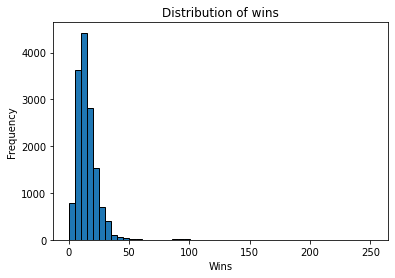

Wins:
Mean: 15.134282178217822
Mode: 13
Median: 14.0
Average: 15.134282178217822
Sum: 220113
Variance: 78.70549689947336
Standard Deviation: 8.871611854644756



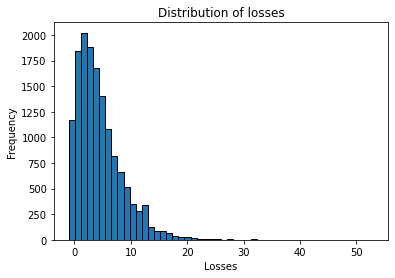

Losses:
Mean: 4.600660066006601
Mode: 2
Median: 4.0
Average: 4.600660066006601
Sum: 66912
Variance: 15.392095273883827
Standard Deviation: 3.9232760894288115



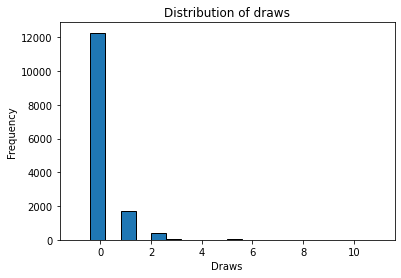

Draws:
Mean: 0.21534653465346534
Mode: 0
Median: 0.0
Average: 0.21534653465346534
Sum: 3132
Variance: 0.41732223964970755
Standard Deviation: 0.6460048294321858



In [5]:
# graph a distribution of index 0 of every list inside all_records

# Extract the values at index 0 from each list in all_records
wins = [record[0] for record in all_records]

# Create a histogram of these values
plt.hist(wins, bins=50, edgecolor='black')
plt.title('Distribution of wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()

#print the statistics of the distribution
mean_wins, mode_wins, median_wins, average_wins, sum_wins, variance_wins, std_wins = calculate_statistics(wins)
print("Wins:")
print_statistics(wins)

#extract the values at index 1 from each list in all_records
losses = [record[1] for record in all_records]

# Create a histogram of these values
plt.hist(losses, bins=50, edgecolor='black')
plt.title('Distribution of losses')
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.show()

#print the statistics of the distribution
mean_losses, mode_losses, median_losses, average_losses, sum_losses, variance_losses, std_losses = calculate_statistics(losses)
print("Losses:")
print_statistics(losses)


#extract the values at index 2 from each list in all_records
draws = [record[2] for record in all_records]

# Create a histogram of these values
plt.hist(draws, bins=20, edgecolor='black')
plt.title('Distribution of draws')
plt.xlabel('Draws')
plt.ylabel('Frequency')
plt.show()

#print the statistics of the distribution
mean_draws, mode_draws, median_draws, average_draws, sum_draws, variance_draws, std_draws = calculate_statistics(draws)
print("Draws:")
print_statistics(draws)

Wins:
Original: 14544, Adjusted: 14050
Losses:
Original: 14544, Adjusted: 13868
Draws:
Original: 14544, Adjusted: 14012


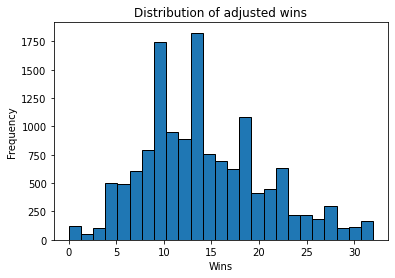

Adjusted Wins:
Mean: 14.167758007117438
Mode: 13
Median: 13.0
Average: 14.167758007117438
Sum: 199057
Variance: 40.6571953293398
Standard Deviation: 6.376299501226382



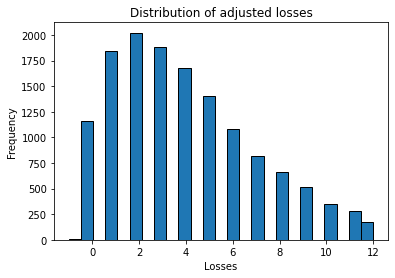

Adjusted Losses:
Mean: 4.03987597346409
Mode: 2
Median: 4.0
Average: 4.03987597346409
Sum: 56025
Variance: 8.59496312277721
Standard Deviation: 2.9317167535042006



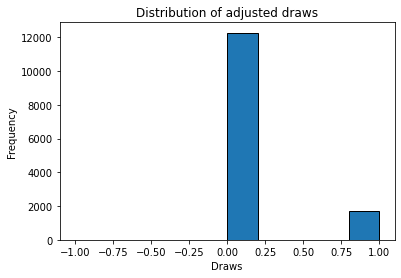

Adjusted Draws:
Mean: 0.1232514987153868
Mode: 0
Median: 0.0
Average: 0.1232514987153868
Sum: 1727
Variance: 0.10891697557226142
Standard Deviation: 0.330025719561766



In [6]:
# Adjust wins, losses, and draws for outliers
wins_adjusted = remove_outliers(wins)
losses_adjusted = remove_outliers(losses)
draws_adjusted = remove_outliers(draws)

#compare the adjusted and unadjusted list sizes
print("Wins:")
print("Original: " + str(len(wins)) + ", Adjusted: " + str(len(wins_adjusted)))
print("Losses:")
print("Original: " + str(len(losses)) + ", Adjusted: " + str(len(losses_adjusted)))
print("Draws:")
print("Original: " + str(len(draws)) + ", Adjusted: " + str(len(draws_adjusted)))

# Create a histogram of adjusted wins
plt.hist(wins_adjusted, bins=25, edgecolor='black')
plt.title('Distribution of adjusted wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()

# Print the statistics of adjusted wins
print("Adjusted Wins:")
print_statistics(wins_adjusted)

# Create a histogram of adjusted losses
plt.hist(losses_adjusted, bins=25, edgecolor='black')
plt.title('Distribution of adjusted losses')
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.show()

# Print the statistics of adjusted losses
print("Adjusted Losses:")
print_statistics(losses_adjusted)

# Create a histogram of adjusted draws
plt.hist(draws_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted draws')
plt.xlabel('Draws')
plt.ylabel('Frequency')
plt.show()

# Print the statistics of adjusted draws
print("Adjusted Draws:")
print_statistics(draws_adjusted)


<h1> The Analysis Of Rematch data </h1>

In [7]:
counter = 0

for fight in database:
    if fight.Rematch:
        counter += 1

#analyse rematches
print("Total: " + str(entries))
print("Rematches: " + str(counter))
print("Non-rematches: " + str(entries - counter))
print("Percentage of rematches: " + str(counter/entries * 100) + "%")



Total: 7272
Rematches: 179
Non-rematches: 7093
Percentage of rematches: 2.4614961496149617%


<h1> Analysis of Knockdowns </h1>

Mean: 0.2152090209020902
Mode: 0
Median: 0.0
Average: 0.2152090209020902
Sum: 3130
Variance: 0.24356406522115356
Standard Deviation: 0.49352210205942504



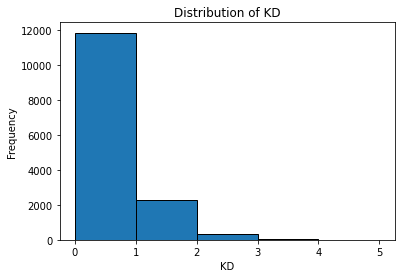

In [8]:
R_KD_list = [fight.R_KD for fight in database]
B_KD_list = [fight.B_KD for fight in database]
KD_list = R_KD_list + B_KD_list

print_statistics(KD_list)

# create a histogram of KD_list

plt.hist(KD_list, bins=5, edgecolor='black')
plt.title('Distribution of KD')
plt.xlabel('KD')
plt.ylabel('Frequency')
plt.show()

<h1> Analysis of Significant Strikes </h1>
*The first block is analyzing the Significant strikes </br>
Again, the outliers need to be excluded when desinging the model because they would skew the values </br> </br>
*The second block analyzes Significant strikes adjusted for outliers </br> 

landed_ss: 
Mean: 35.67161716171617
Mode: 1
Median: 28.0
Average: 35.67161716171617
Sum: 518808
Variance: 999.4276432593755
Standard Deviation: 31.613725551718442



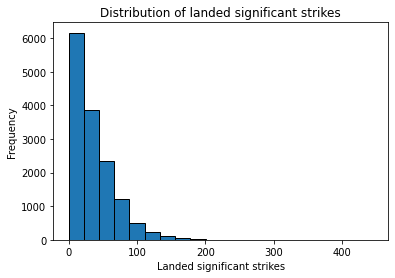

attempted_ss: 
Mean: 80.63105060506051
Mode: 3
Median: 63.0
Average: 80.63105060506051
Sum: 1172698
Variance: 4847.17355731207
Standard Deviation: 69.62164575268291



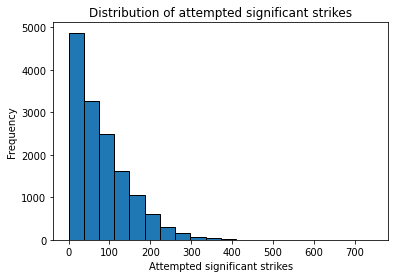

ratio_ss: 
Mean: 0.4558888446116054
Mode: 0.5
Median: 0.4523809523809524
Average: 0.4558888446116054
Sum: 6630.447356031189
Variance: 0.02944820359234041
Standard Deviation: 0.1716047889551466



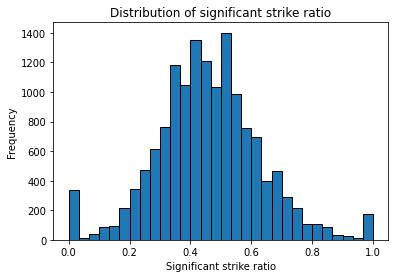

In [9]:
landed_ss = [fight.R_SIG_STR[0] for fight in database] + [fight.B_SIG_STR[0] for fight in database]
attempted_ss = [fight.R_SIG_STR[1] for fight in database] + [fight.B_SIG_STR[1] for fight in database]
ratio_ss = [] 
for i in range(len(landed_ss)):
    if attempted_ss[i] == 0:
        ratio_ss.append(0)
    else:
        ratio_ss.append(landed_ss[i]/attempted_ss[i])

print("landed_ss: ")
print_statistics(landed_ss)
#graph a histogram
plt.hist(landed_ss, bins=20, edgecolor='black')
plt.title('Distribution of landed significant strikes')
plt.xlabel('Landed significant strikes')
plt.ylabel('Frequency')
plt.show()

print("attempted_ss: ")
print_statistics(attempted_ss)
#graph a histogram
plt.hist(attempted_ss, bins=20, edgecolor='black')
plt.title('Distribution of attempted significant strikes')
plt.xlabel('Attempted significant strikes')
plt.ylabel('Frequency')
plt.show()

print("ratio_ss: ")
print_statistics(ratio_ss)
#graph a histogram
plt.hist(ratio_ss, bins=30, edgecolor='black')
plt.title('Distribution of significant strike ratio')
plt.xlabel('Significant strike ratio')
plt.ylabel('Frequency')
plt.show()

landed_ss: 
Original: 14544, Adjusted: 13890
attempted_ss: 
Original: 14544, Adjusted: 13859
ratio_ss: 
Original: 14544, Adjusted: 13692
Adjusted landed_ss:
Mean: 31.35457163426926
Mode: 1
Median: 26.0
Average: 31.35457163426926
Sum: 435515
Variance: 590.4114279842494
Standard Deviation: 24.29838323807264



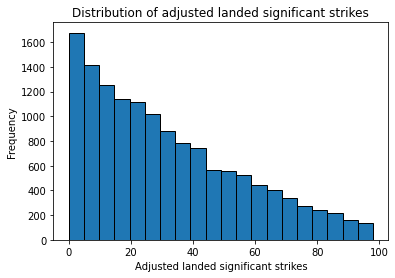

Adjusted attempted_ss:
Mean: 71.07482502345047
Mode: 3
Median: 59.0
Average: 71.07482502345047
Sum: 985026
Variance: 3003.053857165068
Standard Deviation: 54.800126433841996



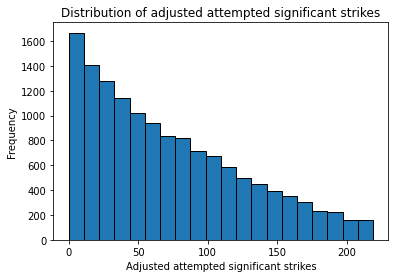

Adjusted ratio_ss:
Mean: 0.4550665845863774
Mode: 0.5
Median: 0.45217391304347826
Average: 0.4550665845863774
Sum: 6230.771676156679
Variance: 0.018708427059630012
Standard Deviation: 0.13677875222281424



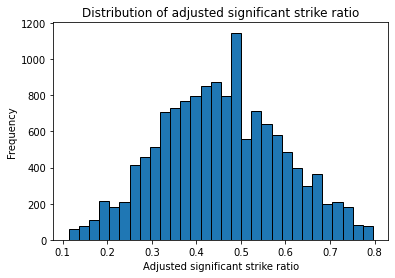

In [10]:
attempted_ss_adjusted = remove_outliers(attempted_ss)
landed_ss_adjusted = remove_outliers(landed_ss)
ratio_ss_adjusted = remove_outliers(ratio_ss)

#the difference betweeen the adjusted and unaadjusted list sizes
print("landed_ss: ")
print("Original: " + str(len(landed_ss)) + ", Adjusted: " + str(len(landed_ss_adjusted)))
print("attempted_ss: ")
print("Original: " + str(len(attempted_ss)) + ", Adjusted: " + str(len(attempted_ss_adjusted)))
print("ratio_ss: ")
print("Original: " + str(len(ratio_ss)) + ", Adjusted: " + str(len(ratio_ss_adjusted)))

print("Adjusted landed_ss:")
print_statistics(landed_ss_adjusted)
# Graph a histogram
plt.hist(landed_ss_adjusted, bins=20, edgecolor='black')
plt.title('Distribution of adjusted landed significant strikes')
plt.xlabel('Adjusted landed significant strikes')
plt.ylabel('Frequency')
plt.show()

print("Adjusted attempted_ss:")
print_statistics(attempted_ss_adjusted)
# Graph a histogram
plt.hist(attempted_ss_adjusted, bins=20, edgecolor='black')
plt.title('Distribution of adjusted attempted significant strikes')
plt.xlabel('Adjusted attempted significant strikes')
plt.ylabel('Frequency')
plt.show()

print("Adjusted ratio_ss:")
print_statistics(ratio_ss_adjusted)
# Graph a histogram
plt.hist(ratio_ss_adjusted, bins=30, edgecolor='black')
plt.title('Distribution of adjusted significant strike ratio')
plt.xlabel('Adjusted significant strike ratio')
plt.ylabel('Frequency')
plt.show()


<h1> Takedown analysis </h1>
again the first box is the normal analysis and the second is where the outliers are excluded </br> 

td_success: 
Mean: 1.0621562156215623
Mode: 0
Median: 0.0
Average: 1.0621562156215623
Sum: 15448
Variance: 2.835520543253445
Standard Deviation: 1.683900395882561



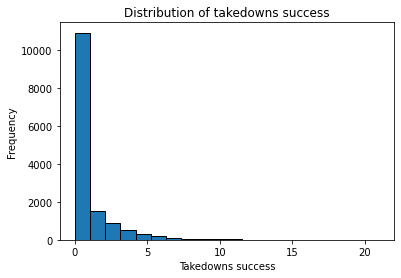

td_attempts: 
Mean: 2.806586908690869
Mode: 0
Median: 1.0
Average: 2.806586908690869
Sum: 40819
Variance: 13.791868053778012
Standard Deviation: 3.7137404397423914



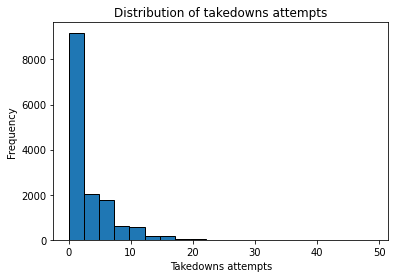

td_ratio: 
Mean: 0.2697869994797034
Mode: 0.0
Median: 0.0
Average: 0.2697869994797034
Sum: 3923.7821204328066
Variance: 0.12706113600268445
Standard Deviation: 0.35645635918396024



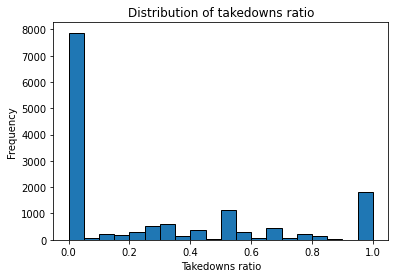

In [11]:
td_success = [fight.R_TD[0] for fight in database] + [fight.B_TD[0] for fight in database]
td_attempts = [fight.R_TD[1] for fight in database] + [fight.B_TD[1] for fight in database]
td_ratio = []
for i in range(len(td_success)):
    if td_attempts[i] == 0:
        td_ratio.append(0)
    else:
        td_ratio.append(td_success[i]/td_attempts[i])

print("td_success: ")
print_statistics(td_success)
#graph a histogram
plt.hist(td_success, bins=20, edgecolor='black')
plt.title('Distribution of takedowns success')
plt.xlabel('Takedowns success')
plt.ylabel('Frequency')
plt.show()

print("td_attempts: ")
print_statistics(td_attempts)
#graph a histogram
plt.hist(td_attempts, bins=20, edgecolor='black')
plt.title('Distribution of takedowns attempts')
plt.xlabel('Takedowns attempts')
plt.ylabel('Frequency')
plt.show()

print("td_ratio: ")
print_statistics(td_ratio)
#graph a histogram
plt.hist(td_ratio, bins=20, edgecolor='black')
plt.title('Distribution of takedowns ratio')
plt.xlabel('Takedowns ratio')
plt.ylabel('Frequency')
plt.show()

td_success: 
Original: 14544, Adjusted: 13792
td_attempts: 
Original: 14544, Adjusted: 13785
td_ratio: 
Original: 14544, Adjusted: 12730
Adjusted takedown success:
Mean: 0.7744344547563805
Mode: 0
Median: 0.0
Average: 0.7744344547563805
Sum: 10681
Variance: 1.207603363453241
Standard Deviation: 1.0989100797850755



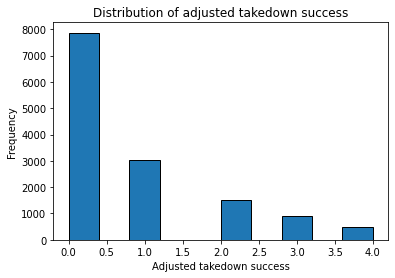

Adjusted takedown attempts:
Mean: 2.1967355821545156
Mode: 0
Median: 1.0
Average: 2.1967355821545156
Sum: 30282
Variance: 6.785089089676965
Standard Deviation: 2.6048203565077124



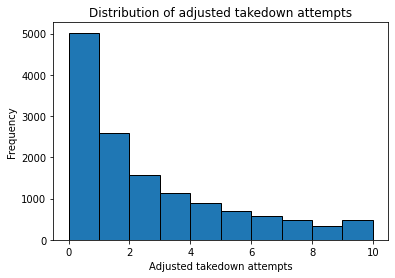

Adjusted takedown ratio:
Mean: 0.16573308094523226
Mode: 0.0
Median: 0.0
Average: 0.16573308094523226
Sum: 2109.7821204328066
Variance: 0.058358356320834574
Standard Deviation: 0.24157474272124263



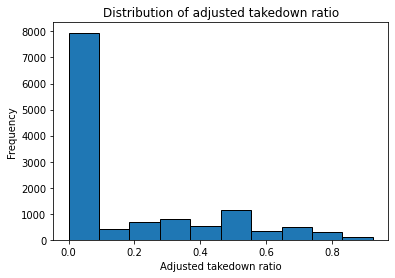

In [12]:
# Adjust takedown success, attempts, and ratio for outliers
td_success_adjusted = remove_outliers(td_success)
td_attempts_adjusted = remove_outliers(td_attempts)
td_ratio_adjusted = remove_outliers(td_ratio)

#the difference betweeen the adjusted and unaadjusted list sizes
print("td_success: ")
print("Original: " + str(len(td_success)) + ", Adjusted: " + str(len(td_success_adjusted)))
print("td_attempts: ")
print("Original: " + str(len(td_attempts)) + ", Adjusted: " + str(len(td_attempts_adjusted)))
print("td_ratio: ")
print("Original: " + str(len(td_ratio)) + ", Adjusted: " + str(len(td_ratio_adjusted)))


print("Adjusted takedown success:")
print_statistics(td_success_adjusted)
# Graph a histogram
plt.hist(td_success_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted takedown success')
plt.xlabel('Adjusted takedown success')
plt.ylabel('Frequency')
plt.show()

print("Adjusted takedown attempts:")
print_statistics(td_attempts_adjusted)
# Graph a histogram
plt.hist(td_attempts_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted takedown attempts')
plt.xlabel('Adjusted takedown attempts')
plt.ylabel('Frequency')
plt.show()

print("Adjusted takedown ratio:")
print_statistics(td_ratio_adjusted)
# Graph a histogram
plt.hist(td_ratio_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted takedown ratio')
plt.xlabel('Adjusted takedown ratio')
plt.ylabel('Frequency')
plt.show()


<h1> Submission attempts analysis </h1>

In [13]:
sub_att_list = [fight.R_SUB_ATT + fight.B_SUB_ATT for fight in database]
print("sub_att_list:")
print("list size: " + str(len(sub_att_list)))
print_statistics(sub_att_list)

#adjust for outliers
sub_att_list_adjusted = remove_outliers(sub_att_list)
print("Adjusted sub_att_list:")
print("list size: " + str(len(sub_att_list_adjusted)))
print_statistics(sub_att_list_adjusted)

sub_att_list:
list size: 7272
Mean: 0.7865786578657866
Mode: 0
Median: 0.0
Average: 0.7865786578657866
Sum: 5720
Variance: 1.4530761932078797
Standard Deviation: 1.205436100839808

Adjusted sub_att_list:
list size: 6987
Mean: 0.6208673250322027
Mode: 0
Median: 0.0
Average: 0.6208673250322027
Sum: 4338
Variance: 0.7471987325046953
Standard Deviation: 0.8644065782400636



<h1>How much time was spent on the ground analysis </h1>
<h3>Using ctrl time</h3>
The important thing with control time is telling us how much time was spent on the ground, control time itself isn't an important variable. </br> </br>
For this we will take into consideration control time for both fighters, last_round and last_round_time </br></br>

*The standard format starts from entry 7091, the remaining 200 fights can be ignored, because I said so....

time_on_ground:
Mean: 365.6830308030803
Mode: 900
Median: 292.0
Average: 365.6830308030803
Sum: 2659247
Variance: 87743.95027310247
Standard Deviation: 296.2160533683184



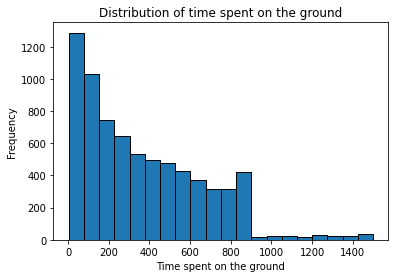

time_on_ground: 
Original: 7272, Adjusted: 7093
Adjusted time_on_ground:
Mean: 343.49471309742
Mode: 900
Median: 282.0
Average: 343.49471309742
Sum: 2436408
Variance: 69272.10814207545
Standard Deviation: 263.19595008676606



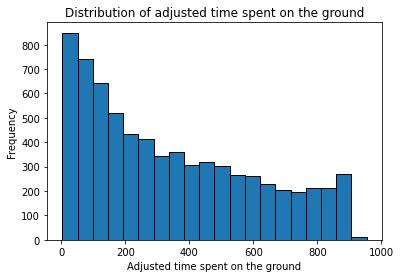

In [14]:
time_on_ground = []
for fight in database:
    total_time = (fight.last_round - 1) * 300 + fight.last_round_time
    time_on_ground.append(total_time - fight.R_CTRL - fight.B_CTRL)

#this is the time spent on the ground in the fight

# find statistics and draw a histogram
print("time_on_ground:")
print_statistics(time_on_ground)
plt.hist(time_on_ground, bins=20, edgecolor='black')
plt.title('Distribution of time spent on the ground')
plt.xlabel('Time spent on the ground')
plt.ylabel('Frequency')
plt.show()

#adjust for outliers
time_on_ground_adjusted = remove_outliers(time_on_ground)

#the difference betweeen the adjusted and unaadjusted list sizes
print("time_on_ground: ")
print("Original: " + str(len(time_on_ground)) + ", Adjusted: " + str(len(time_on_ground_adjusted)))

# find statistics and draw a histogram
print("Adjusted time_on_ground:")
print_statistics(time_on_ground_adjusted)
plt.hist(time_on_ground_adjusted, bins=20, edgecolor='black')
plt.title('Distribution of adjusted time spent on the ground')
plt.xlabel('Adjusted time spent on the ground')
plt.ylabel('Frequency')
plt.show()


<h1>Now we analyze headshots... </h1>

head_landed: 
Mean: 22.519801980198018
Mode: 0
Median: 16.0
Average: 22.519801980198018
Sum: 327528
Variance: 487.52408532932503
Standard Deviation: 22.07994758438808



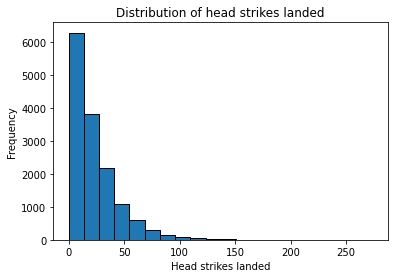

head_attempted: 
Mean: 62.803011551155116
Mode: 1
Median: 48.0
Average: 62.803011551155116
Sum: 913407
Variance: 3234.578013482815
Standard Deviation: 56.873350644065404



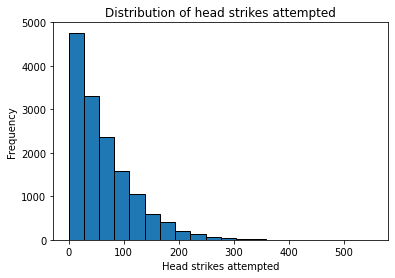

head_ratio: 
Mean: 0.3628450217549156
Mode: 0.0
Median: 0.35294117647058826
Average: 0.3628450217549156
Sum: 5277.217996403493
Variance: 0.034411901532388336
Standard Deviation: 0.1855044515163675



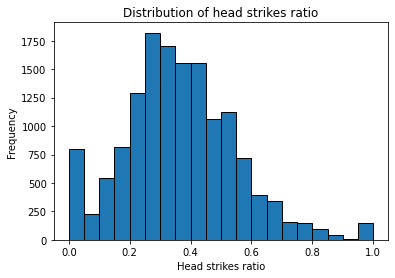

head_landed: 
Original: 14544, Adjusted: 13870
head_attempted: 
Original: 14544, Adjusted: 13836
head_ratio: 
Original: 14544, Adjusted: 14075
Adjusted head strikes landed:
Mean: 19.290266762797405
Mode: 0
Median: 16.0
Average: 19.290266762797405
Sum: 267556
Variance: 258.07017923669633
Standard Deviation: 16.06456283988756



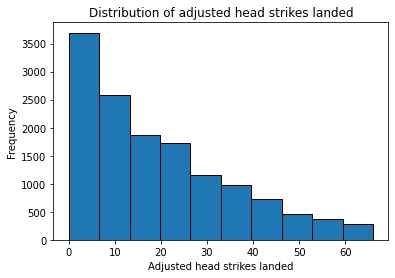

Adjusted head strikes attempted:
Mean: 54.54387106100029
Mode: 1
Median: 45.0
Average: 54.54387106100029
Sum: 754669
Variance: 1877.1468900163325
Standard Deviation: 43.326053247628415



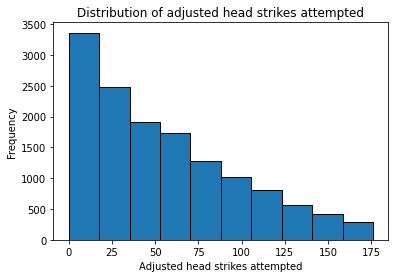

Adjusted head strikes ratio:
Mean: 0.3462773413551331
Mode: 0.0
Median: 0.3448275862068966
Average: 0.3462773413551331
Sum: 4873.853579573499
Variance: 0.026702390003920967
Standard Deviation: 0.1634086595132613



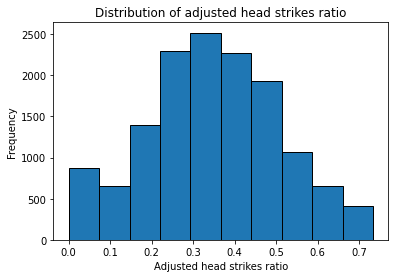

In [15]:
head_landed = [fight.R_HEAD[0] for fight in database] + [fight.B_HEAD[0] for fight in database]
head_attempted = [fight.R_HEAD[1] for fight in database] + [fight.B_HEAD[1] for fight in database]
head_ratio = []
for i in range(len(head_landed)):
    if head_attempted[i] == 0:
        head_ratio.append(0)
    else:
        head_ratio.append(head_landed[i]/head_attempted[i])

print("head_landed: ")
print_statistics(head_landed)
#graph a histogram
plt.hist(head_landed, bins=20, edgecolor='black')
plt.title('Distribution of head strikes landed')
plt.xlabel('Head strikes landed')
plt.ylabel('Frequency')
plt.show()

print("head_attempted: ")
print_statistics(head_attempted)
#graph a histogram
plt.hist(head_attempted, bins=20, edgecolor='black')
plt.title('Distribution of head strikes attempted')
plt.xlabel('Head strikes attempted')
plt.ylabel('Frequency')
plt.show()

print("head_ratio: ")
print_statistics(head_ratio)
#graph a histogram
plt.hist(head_ratio, bins=20, edgecolor='black')
plt.title('Distribution of head strikes ratio')
plt.xlabel('Head strikes ratio')
plt.ylabel('Frequency')
plt.show()

# Adjust head strikes landed, attempted, and ratio for outliers
head_landed_adjusted = remove_outliers(head_landed)
head_attempted_adjusted = remove_outliers(head_attempted)
head_ratio_adjusted = remove_outliers(head_ratio)


#the difference betweeen the adjusted and unaadjusted list sizes
print("head_landed: ")
print("Original: " + str(len(head_landed)) + ", Adjusted: " + str(len(head_landed_adjusted)))
print("head_attempted: ")
print("Original: " + str(len(head_attempted)) + ", Adjusted: " + str(len(head_attempted_adjusted)))
print("head_ratio: ")
print("Original: " + str(len(head_ratio)) + ", Adjusted: " + str(len(head_ratio_adjusted)))

print("Adjusted head strikes landed:")
print_statistics(head_landed_adjusted)
# Graph a histogram
plt.hist(head_landed_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted head strikes landed')
plt.xlabel('Adjusted head strikes landed')
plt.ylabel('Frequency')
plt.show()

print("Adjusted head strikes attempted:")
print_statistics(head_attempted_adjusted)
# Graph a histogram
plt.hist(head_attempted_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted head strikes attempted')
plt.xlabel('Adjusted head strikes attempted')
plt.ylabel('Frequency')
plt.show()

print("Adjusted head strikes ratio:")
print_statistics(head_ratio_adjusted)
# Graph a histogram
plt.hist(head_ratio_adjusted, bins=10, edgecolor='black')
plt.title('Distribution of adjusted head strikes ratio')
plt.xlabel('Adjusted head strikes ratio')
plt.ylabel('Frequency')
plt.show()


<h1>Analyze the wins </h1>
for wins, find percentage of knockouts, decisions and other things, make a bar chart, no need for statistics

Knockout wins: 2302
Submission wins: 1444
Decision wins: 3341
Other wins: 185
Knockout percentage: 31.655665566556657%
Submission percentage: 19.856985698569858%
Decision percentage: 45.94334433443345%
Other percentage: 2.544004400440044%


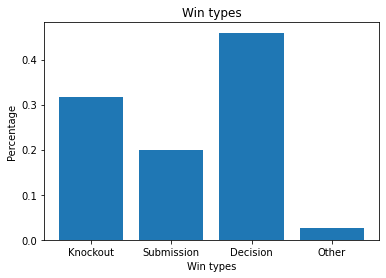

In [16]:
#find the number percentage of knockout wins out of all the wins

knockout_wins = 0
submission_wins = 0
decision_wins = 0
other_wins = 0
for fight in database:
    if "KO/TKO" in fight.win_by:
        knockout_wins += 1
    elif "Submission" in fight.win_by:
        submission_wins += 1
    elif "Decision" in fight.win_by:
        decision_wins += 1
    else:
        other_wins += 1
#make a histogram comparing the different win types
print("Knockout wins: " + str(knockout_wins))
print("Submission wins: " + str(submission_wins))
print("Decision wins: " + str(decision_wins))
print("Other wins: " + str(other_wins))

#find the percentage of wins by knockout
knockout_percentage = knockout_wins / (knockout_wins + submission_wins + decision_wins + other_wins)
print("Knockout percentage: " + str(knockout_percentage * 100) + "%")

#find the percentage of wins by submission
submission_percentage = submission_wins / (knockout_wins + submission_wins + decision_wins + other_wins)
print("Submission percentage: " + str(submission_percentage * 100) + "%")

#find the percentage of wins by decision
decision_percentage = decision_wins / (knockout_wins + submission_wins + decision_wins + other_wins)
print("Decision percentage: " + str(decision_percentage * 100) + "%")

#find the percentage of wins by other
other_percentage = other_wins / (knockout_wins + submission_wins + decision_wins + other_wins)
print("Other percentage: " + str(other_percentage * 100) + "%")

#make a bar chart for the win types
win_types = ["Knockout", "Submission", "Decision", "Other"]
win_percentages = [knockout_percentage, submission_percentage, decision_percentage, other_percentage]
plt.bar(win_types, win_percentages)
plt.title('Win types')
plt.xlabel('Win types')
plt.ylabel('Percentage')
plt.show()

<h1>Analyze the fight type</h1>
analyze how many fights are title fights, how many are mens vs women, and how many title fights are in women vs men divisions etc...

Title fights: 412
Non-title fights: 6860
Percentage of title fights: 5.665566556655666%
Men's Title fights: 358
Men's Non-title fights:  6221
Percentage of Men title fights: 5.441556467548259%
Women's Title fights: 54
Women's Non-title fights: 639
Percentage of Women title fights: 7.792207792207792%
Ratio of men's to women's fights: 9.493506493506494


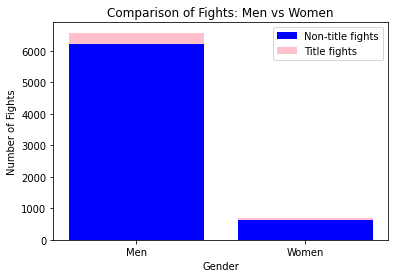

In [17]:
#find what percentage of fights are title fights
title_fights = 0
non_title_fights = 0
men_title_fights = 0
men_non_title_fights = 0
women_title_fights = 0
women_non_title_fights = 0
for fight in database:
    if "Title" in fight.Fight_type:
        title_fights += 1
        if "Men" in fight.Fight_type:
            men_title_fights += 1
        elif "Women" in fight.Fight_type:
                women_title_fights += 1
        else:
            print("Error in gender")
    else:
        non_title_fights += 1
        if "Men" in fight.Fight_type:
            men_non_title_fights += 1
        elif "Women" in fight.Fight_type:
                women_non_title_fights += 1
        else:
            print("Error in gender")

#the ratio of men and women fights
ratio_men_women = (men_non_title_fights+men_title_fights) / (women_non_title_fights+women_title_fights)

print("Title fights: " + str(title_fights))
print("Non-title fights: " + str(non_title_fights))
print("Percentage of title fights: " + str(title_fights / (title_fights + non_title_fights) * 100) + "%")
print("Men's Title fights: " + str(men_title_fights))
print("Men's Non-title fights:  " + str(men_non_title_fights))
print("Percentage of Men title fights: " + str(men_title_fights / (men_title_fights + men_non_title_fights) * 100) + "%")
print("Women's Title fights: " + str(women_title_fights))
print("Women's Non-title fights: " + str(women_non_title_fights))
print("Percentage of Women title fights: " + str(women_title_fights / (women_title_fights + women_non_title_fights) * 100) + "%")
print("Ratio of men's to women's fights: " + str(ratio_men_women))

# Labels for the bars
labels = ['Men', 'Women']

# Values for the bars
non_title_values = [men_non_title_fights, women_non_title_fights]
title_values = [men_title_fights, women_title_fights]

# Create the bar chart
plt.bar(labels, non_title_values, color='blue', label='Non-title fights')
plt.bar(labels, title_values, bottom=non_title_values, color='pink', label='Title fights')

# Add a title and labels
plt.title('Comparison of Fights: Men vs Women')
plt.xlabel('Gender')
plt.ylabel('Number of Fights')

# Add a legend
plt.legend()

# Display the chart
plt.show()



<h1>Put into a docx or something </h1>
format it in a convenient way, for future Nuh's sake..